In [19]:
import math
import numpy as np
import codecs, json 
import cv2
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import mixture
from scipy import linalg as la

In [20]:
path = 'cold/output-4/2.txt'
arr1 = np.zeros([100,8,8])
with open(path) as f:
    for k in range(100):
        for i in range(8):
            line = f.readline()
            t = [float(x) for x in line.split()]
            arr1[k,i] = t
        line = f.readline()

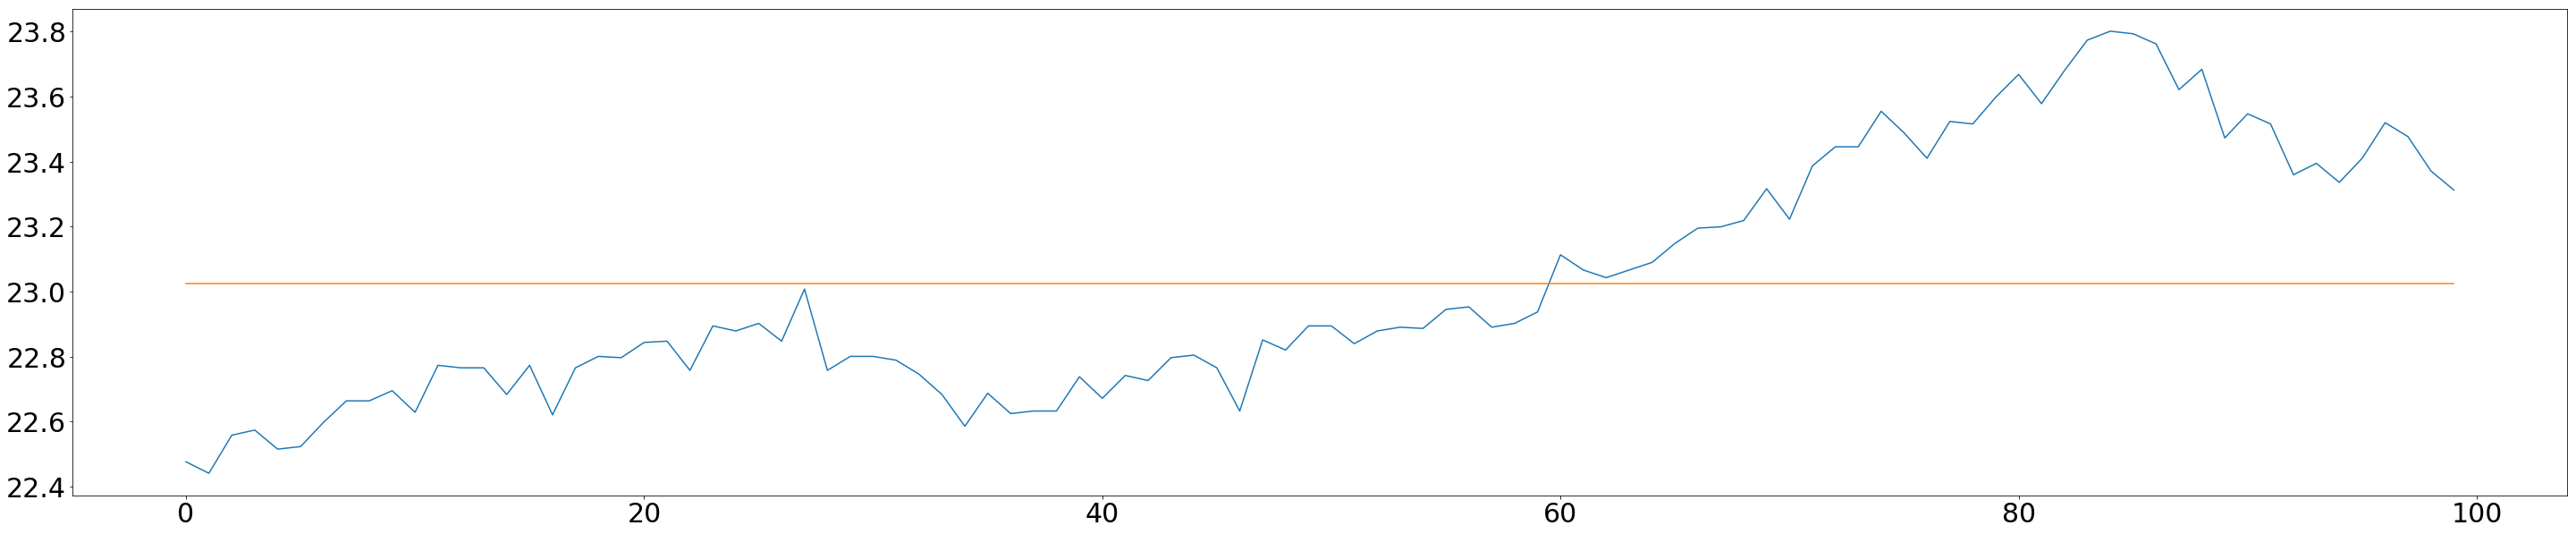

In [21]:
arr_ambient = np.mean(arr1,axis = (1,2))
ave_temp = np.mean(arr1)

plt.figure(figsize=(50, 10))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(arr_ambient)
plt.plot(np.ones(100)*ave_temp)
plt.show()

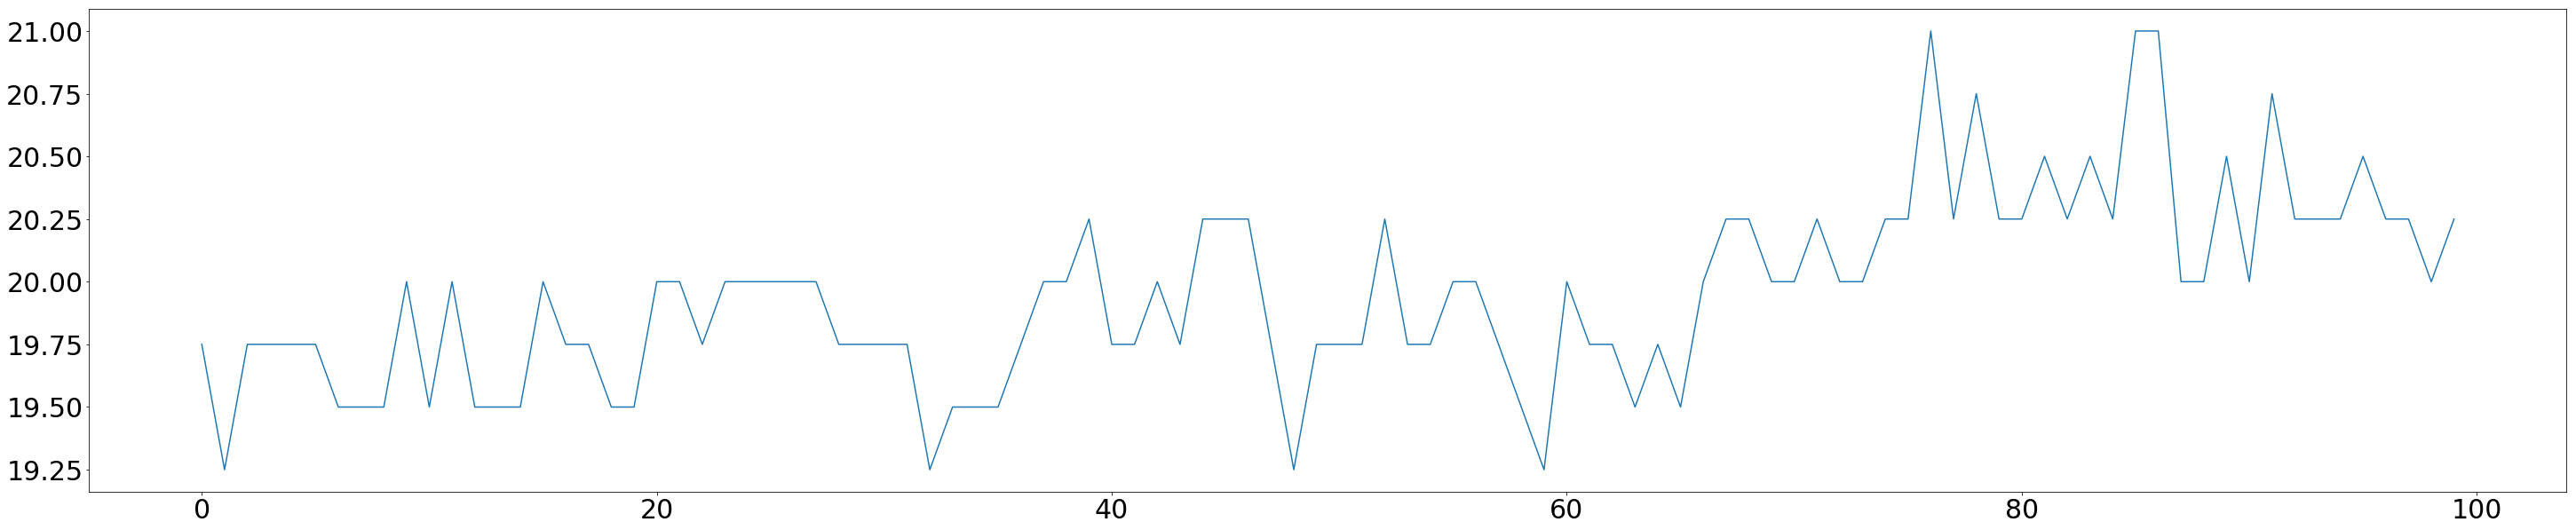

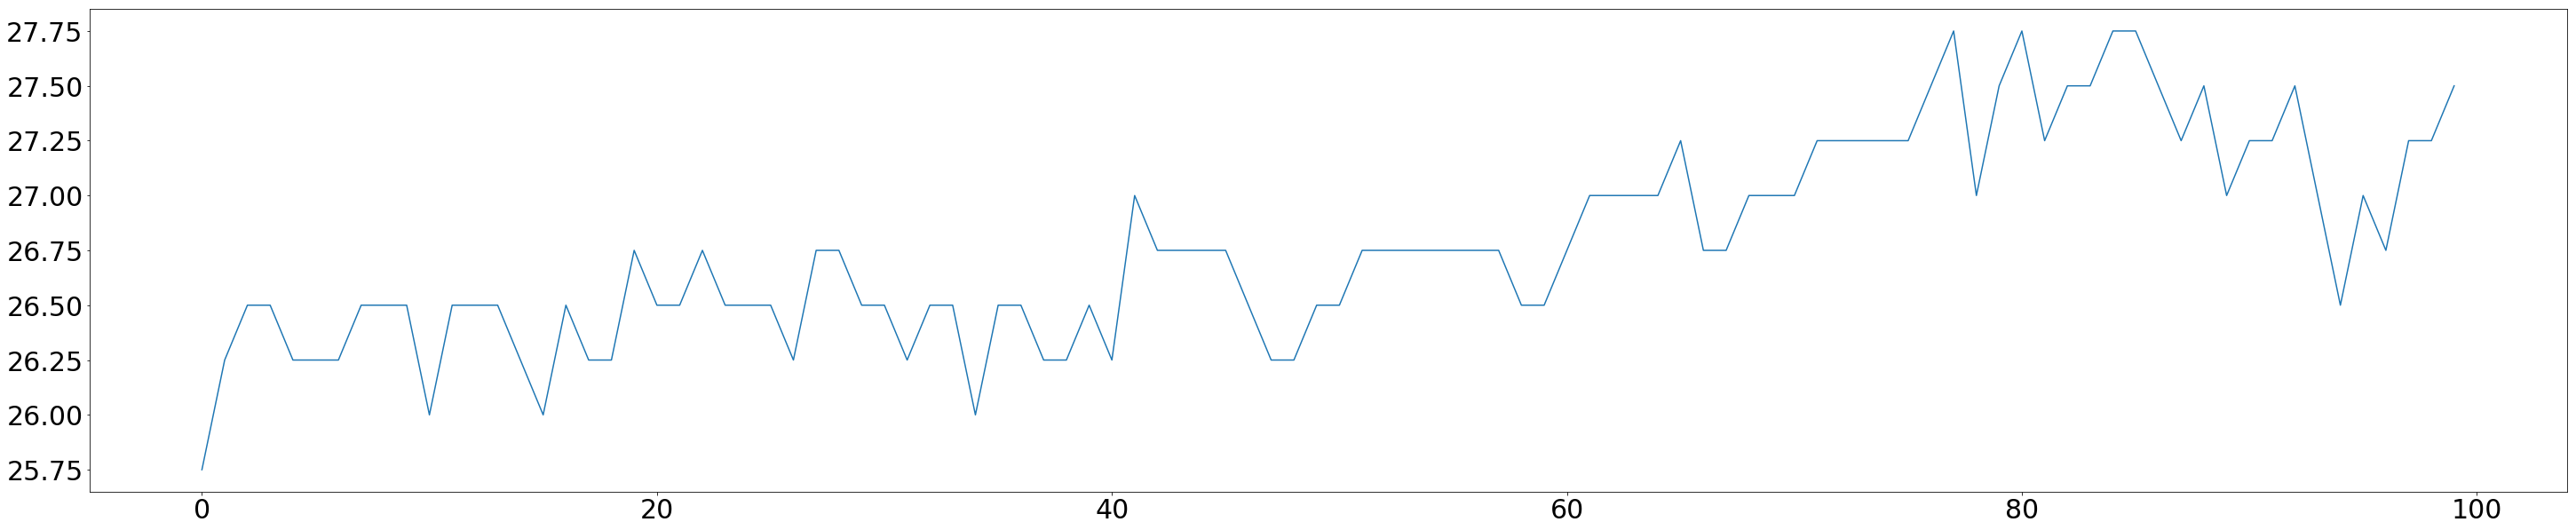

In [34]:
plt.figure(figsize=(50, 10))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(arr1[:,7,7])
plt.show()
plt.figure(figsize=(50, 10))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(arr1[:,2,3])
plt.show()

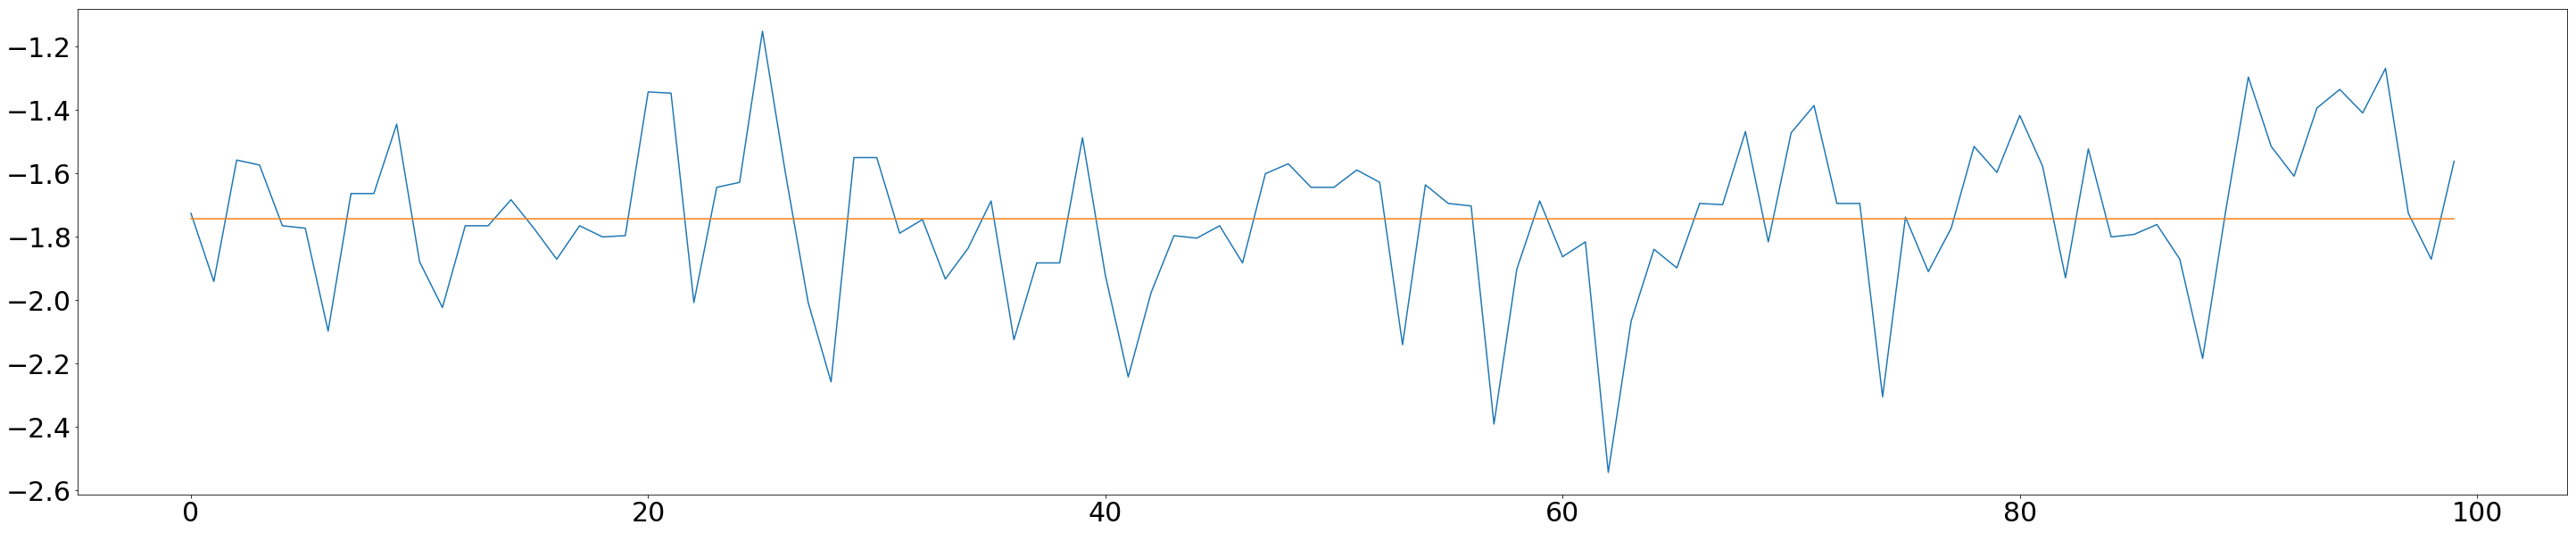

In [22]:
arr_noise = np.transpose(arr1,(1,2,0))-arr_ambient
arr_noise = np.transpose(arr_noise,(2,0,1))
arr_ave = np.mean(arr_noise,axis = 0)

plt.figure(figsize=(50, 10))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(arr_noise[:,0,0])
plt.plot(np.ones(100)*arr_ave[0,0])
plt.show()

In [23]:
gm = mixture.GaussianMixture(n_components=2, max_iter = 1000).fit_predict(
    np.reshape(arr_noise,(-1,1))).reshape(-1,8,8)

In [24]:
if gm.reshape(-1)[np.argmax(arr1)]:
    gm = 1 -gm
gm_mean = np.mean(gm,axis = 0).round(0)
bg = np.sum(arr1*(gm_mean))/np.sum(gm_mean)/100
bg

21.64609756097561

In [25]:
human = np.sum(arr1*(1-gm_mean))/np.sum(1-gm_mean)/100
human

25.480108695652174

In [26]:
ave_temp

23.0239453125

In [27]:
pre_final = arr_ave + bg*gm_mean + human*(1-gm_mean)
pre_final.round(2)

array([[19.9 , 20.73, 21.31, 22.02, 20.84, 20.78, 19.71, 18.9 ],
       [20.04, 20.95, 22.29, 27.17, 22.38, 21.48, 20.07, 18.69],
       [20.26, 21.44, 28.84, 29.23, 29.01, 27.3 , 20.6 , 18.97],
       [20.17, 20.54, 28.77, 27.29, 29.03, 28.24, 19.93, 17.87],
       [19.67, 19.68, 27.55, 21.96, 27.64, 21.45, 17.18, 16.65],
       [19.98, 21.35, 27.77, 27.59, 28.  , 27.17, 19.88, 17.79],
       [20.31, 26.82, 28.37, 27.98, 28.79, 27.59, 22.42, 19.2 ],
       [19.64, 21.41, 26.9 , 28.04, 27.45, 22.55, 21.39, 18.57]])

In [28]:
time_ave = np.mean(arr1,axis = 0)
pre_final = arr_ave + time_ave
pre_final.round(2)

array([[19.54, 21.19, 22.35, 23.78, 21.41, 21.29, 19.16, 17.54],
       [19.81, 21.64, 24.32, 26.41, 24.5 , 22.7 , 19.87, 17.12],
       [20.26, 22.61, 29.74, 30.52, 30.08, 26.67, 20.94, 17.67],
       [20.08, 20.82, 29.6 , 26.65, 30.12, 28.54, 19.59, 15.48],
       [19.07, 19.09, 27.17, 23.65, 27.34, 22.64, 14.09, 13.04],
       [19.69, 22.44, 27.61, 27.24, 28.07, 26.4 , 19.49, 15.31],
       [20.36, 25.71, 28.8 , 28.03, 29.64, 27.25, 24.57, 18.13],
       [19.02, 22.56, 25.86, 28.15, 26.96, 24.83, 22.52, 16.87]])

In [29]:
np.mean(arr1,axis = 0).round(2)

array([[21.28, 22.11, 22.69, 23.4 , 22.22, 22.16, 21.09, 20.28],
       [21.42, 22.33, 23.67, 24.72, 23.76, 22.86, 21.45, 20.07],
       [21.64, 22.82, 26.38, 26.77, 26.55, 24.84, 21.98, 20.35],
       [21.55, 21.92, 26.31, 24.84, 26.57, 25.78, 21.3 , 19.25],
       [21.04, 21.06, 25.1 , 23.34, 25.18, 22.83, 18.56, 18.03],
       [21.36, 22.73, 25.32, 25.13, 25.54, 24.71, 21.26, 19.16],
       [21.69, 24.36, 25.91, 25.53, 26.33, 25.14, 23.8 , 20.58],
       [21.02, 22.79, 24.44, 25.59, 24.99, 23.92, 22.77, 19.95]])

In [30]:
deconv = np.zeros([8,8,8,8])
s = 0.55
for i in range(8):
    for j in range(8):
        weight = 0
        for m in range(8):
            for n in range(8):
                deconv[i,j,m,n] = math.exp(-math.pow(np.linalg.norm(np.array([i,j]-np.array([m,n])))/s,2)*0.5)
                weight += deconv[i,j,m,n]
        deconv[i,j] /= weight

In [31]:
deconv = np.reshape(deconv,(64,64))
samp = np.reshape(pre_final,(64))
ans = np.linalg.solve(deconv,samp)

In [32]:
np.set_printoptions(precision=2, suppress=True)
np.reshape(ans,(8,8))

array([[19.12, 21.39, 21.86, 24.28, 20.12, 21.73, 18.83, 17.46],
       [19.44, 21.47, 23.2 , 26.83, 23.64, 22.37, 19.96, 16.19],
       [20.02, 22.  , 32.38, 32.28, 31.78, 27.02, 20.75, 17.75],
       [20.6 , 18.58, 33.23, 24.14, 31.51, 32.36, 19.7 , 14.78],
       [19.3 , 15.57, 30.07, 19.45, 29.16, 20.52,  9.83, 12.55],
       [19.24, 21.82, 28.33, 28.07, 27.63, 28.86, 18.97, 14.46],
       [19.44, 27.9 , 30.74, 26.71, 32.07, 27.09, 27.49, 17.38],
       [18.08, 21.73, 24.98, 29.21, 26.09, 24.21, 22.66, 15.27]])

In [33]:
deconv = np.reshape(deconv,(64,64))
samp = np.reshape(time_ave,(64))
ans = np.linalg.solve(deconv,samp)

np.set_printoptions(precision=2, suppress=True)
np.reshape(ans,(8,8))

array([[21.07, 22.2 , 22.44, 23.65, 21.57, 22.37, 20.93, 20.24],
       [21.23, 22.25, 23.11, 24.93, 23.33, 22.7 , 21.49, 19.61],
       [21.52, 22.51, 27.7 , 27.65, 27.4 , 25.02, 21.88, 20.39],
       [21.81, 20.8 , 28.13, 23.58, 27.27, 27.69, 21.36, 18.9 ],
       [21.16, 19.3 , 26.55, 21.24, 26.09, 21.77, 16.43, 17.79],
       [21.13, 22.42, 25.68, 25.55, 25.33, 25.94, 21.  , 18.74],
       [21.23, 25.46, 26.88, 24.87, 27.55, 25.06, 25.25, 20.2 ],
       [20.55, 22.38, 24.  , 26.11, 24.56, 23.62, 22.84, 19.15]])

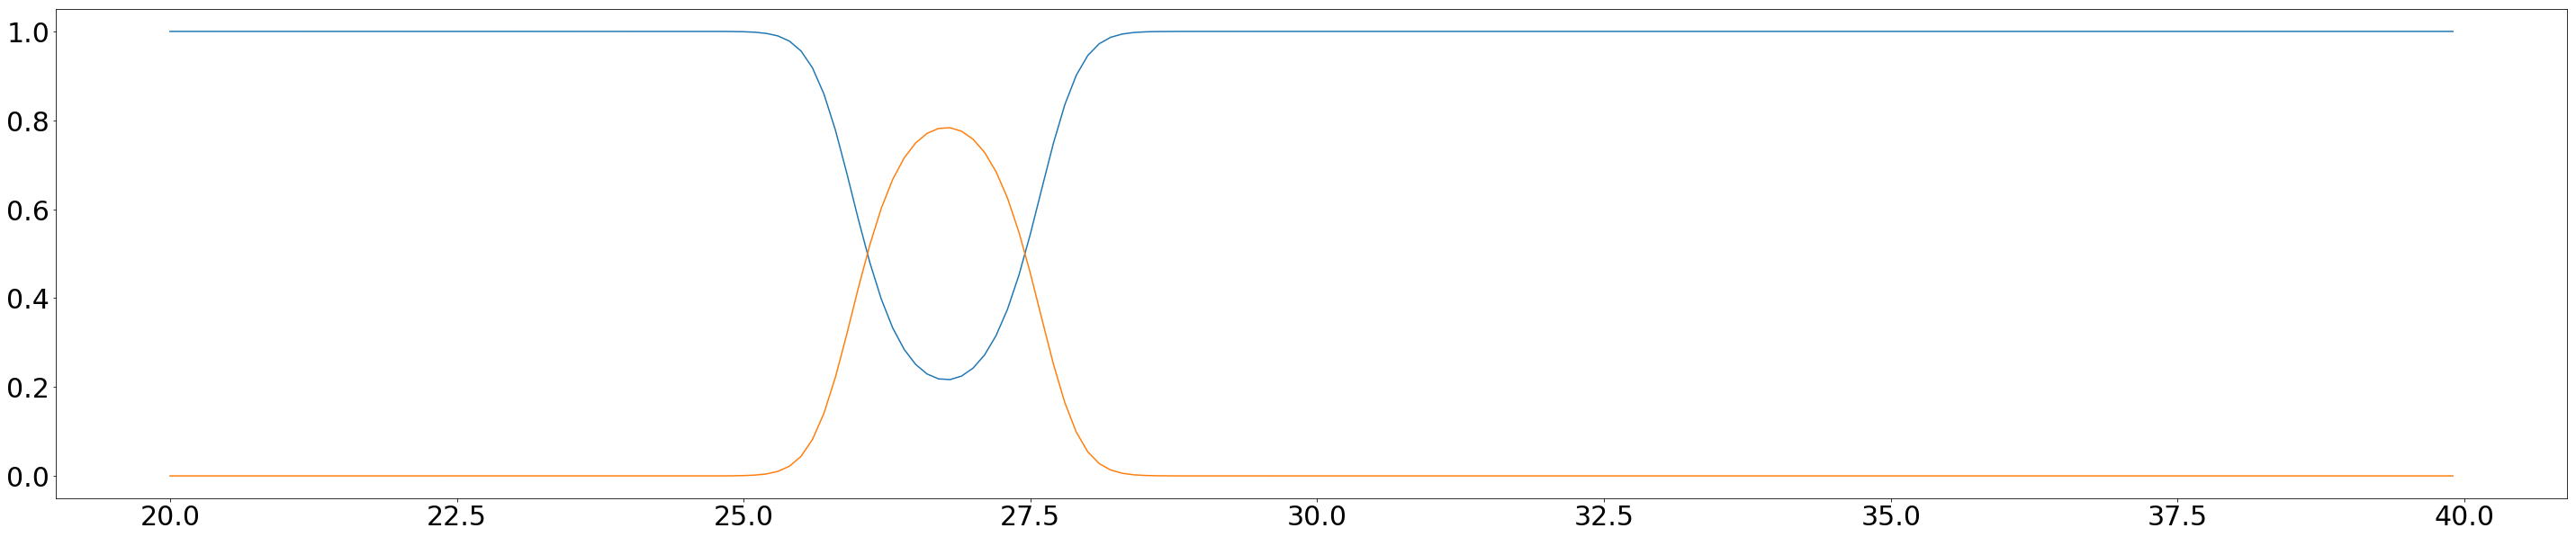

In [283]:
gm = mixture.GaussianMixture(n_components=2, max_iter = 1000).fit(np.reshape(arr1,(-1,1)))
plt.figure(figsize=(50, 10))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(np.arange(20,40,0.1),gm.predict_proba(np.arange(20,40,0.1).reshape(-1,1))[:,0])
plt.plot(np.arange(20,40,0.1),gm.predict_proba(np.arange(20,40,0.1).reshape(-1,1))[:,1])
# plt.plot(np.arange(20,40,0.1),gm.score_samples(np.arange(20,40,0.1).reshape(-1,1)))
# plt.plot(np.arange(20,40,0.1),gm.predict_proba(np.arange(20,40,0.1).reshape(-1,1))[:,2])
plt.show()

In [74]:
np.reshape(pre_final,(1,-1))

array([[26.6925, 27.2425, 27.135 , 27.2525, 27.0475, 27.14  , 27.3575,
        27.09  , 26.78  , 27.16  , 27.0575, 26.995 , 26.7675, 26.81  ,
        26.8425, 26.56  , 27.03  , 27.815 , 27.33  , 27.1025, 26.86  ,
        26.73  , 26.81  , 26.8375, 27.4575, 29.0025, 27.5675, 27.03  ,
        26.585 , 26.66  , 26.6925, 26.315 , 27.78  , 29.4025, 28.2025,
        26.905 , 26.77  , 26.365 , 26.4125, 26.43  , 27.795 , 28.7275,
        28.285 , 27.47  , 27.275 , 27.3675, 27.01  , 27.84  , 27.275 ,
        28.425 , 28.19  , 27.34  , 27.7125, 27.7225, 27.685 , 27.2575,
        27.0875, 27.455 , 27.5475, 27.1375, 27.245 , 26.9825, 27.0025,
        26.67  ]])